# Прогнозирование вероятности оттока пользователей фитнес-центра

Описание проекта

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Индикаторы оттока зависят от специфики отрасли. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.

План
- Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- Проанализировать основные признаки, наиболее сильно влияющие на отток;
- Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами: выделить целевые группы клиентов; предложить меры по снижению оттока; определить другие особенности взаимодействия с клиентами.

Исследование состоит из нескольких частей:
- Шаг 1. Загрузить данные
- Шаг 2. Провести исследовательский анализ данных (EDA)
- Шаг 3. Построить модель прогнозирования оттока клиентов
- Шаг 4. Сделать кластеризацию клиентов
- Шаг 5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами

Описание таблицы
- 'Churn' — факт оттока в текущем месяце;
- Данные клиента за предыдущий до проверки факта оттока месяц:
 - 'gender' — пол;
 - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
 - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
 - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
 - 'Phone' — наличие контактного телефона;
 - 'Age' — возраст;
 - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
 - 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
 - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
 - 'Group_visits' — факт посещения групповых занятий;
 - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
 - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
 - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузить-данные" data-toc-modified-id="Шаг-1.-Загрузить-данные-1">Шаг 1. Загрузить данные</a></span></li><li><span><a href="#Шаг-2.-Провести-исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Шаг-2.-Провести-исследовательский-анализ-данных-(EDA)-2">Шаг 2. Провести исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Посмотрим,-есть-ли-в-датасете-отсутствующие-признаки,-изучим-средние-значения-и-стандартные-отклонения" data-toc-modified-id="Посмотрим,-есть-ли-в-датасете-отсутствующие-признаки,-изучим-средние-значения-и-стандартные-отклонения-2.0.1">Посмотрим, есть ли в датасете отсутствующие признаки, изучим средние значения и стандартные отклонения</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.1.1">Вывод</a></span></li></ul></li><li><span><a href="#Посмотрим-на-средние-значения-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался" data-toc-modified-id="Посмотрим-на-средние-значения-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался-2.0.2">Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.2.1">Вывод</a></span></li></ul></li><li><span><a href="#Построим-столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался" data-toc-modified-id="Построим-столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-2.0.3">Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался</a></span></li><li><span><a href="#Построим-матрицу-корреляций-и-отобразим-её" data-toc-modified-id="Построим-матрицу-корреляций-и-отобразим-её-2.0.4">Построим матрицу корреляций и отобразим её</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.4.1">Вывод</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Шаг-3.-Построить-модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Шаг-3.-Построить-модель-прогнозирования-оттока-клиентов-3">Шаг 3. Построить модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Разобъем-данные-на-обучающую-и-валидационную-выборку-функцией-train_test_split()" data-toc-modified-id="Разобъем-данные-на-обучающую-и-валидационную-выборку-функцией-train_test_split()-3.0.1">Разобъем данные на обучающую и валидационную выборку функцией train_test_split()</a></span></li><li><span><a href="#Обучим-модель-на-train-выборке-двумя-способами" data-toc-modified-id="Обучим-модель-на-train-выборке-двумя-способами-3.0.2">Обучим модель на train-выборке двумя способами</a></span></li><li><span><a href="#Оценим-метрики-accuracy,-precision-и-recall-для-обеих-моделей-на-валидационной-выборке" data-toc-modified-id="Оценим-метрики-accuracy,-precision-и-recall-для-обеих-моделей-на-валидационной-выборке-3.0.3">Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.0.4">Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Шаг-4.-Сделать-кластеризацию-клиентов" data-toc-modified-id="Шаг-4.-Сделать-кластеризацию-клиентов-4">Шаг 4. Сделать кластеризацию клиентов</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Стандартизируем-данные" data-toc-modified-id="Стандартизируем-данные-4.0.1">Стандартизируем данные</a></span></li><li><span><a href="#Построим-матрицу-расстояний-функцией-linkage()-на-стандартизованной-матрице-признаков-и-нарисуем-дендрограмму" data-toc-modified-id="Построим-матрицу-расстояний-функцией-linkage()-на-стандартизованной-матрице-признаков-и-нарисуем-дендрограмму-4.0.2">Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.2.1">Вывод</a></span></li></ul></li><li><span><a href="#Обучим-модель-кластеризации-на-основании-алгоритма-K-Means-и-спрогнозируем-кластеры-клиентов" data-toc-modified-id="Обучим-модель-кластеризации-на-основании-алгоритма-K-Means-и-спрогнозируем-кластеры-клиентов-4.0.3">Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов</a></span></li><li><span><a href="#Посмотрим-на-средние-значения-признаков-для-кластеров" data-toc-modified-id="Посмотрим-на-средние-значения-признаков-для-кластеров-4.0.4">Посмотрим на средние значения признаков для кластеров</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.4.1">Вывод</a></span></li></ul></li><li><span><a href="#Построим-распределения-признаков-для-кластеров" data-toc-modified-id="Построим-распределения-признаков-для-кластеров-4.0.5">Построим распределения признаков для кластеров</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.5.1">Вывод</a></span></li></ul></li><li><span><a href="#Для-каждого-полученного-кластера-посчитаем-долю-оттока" data-toc-modified-id="Для-каждого-полученного-кластера-посчитаем-долю-оттока-4.0.6">Для каждого полученного кластера посчитаем долю оттока</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.6.1">Вывод</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Шаг-5.-Сформулировать-выводы-и-сделать-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Шаг-5.-Сформулировать-выводы-и-сделать-базовые-рекомендации-по-работе-с-клиентами-5">Шаг 5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-5.0.1">Рекомендации</a></span></li></ul></li></ul></li></ul></div>

## Шаг 1. Загрузить данные

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.columns = df.columns.str.lower()

## Шаг 2. Провести исследовательский анализ данных (EDA)

#### Посмотрим, есть ли в датасете отсутствующие признаки, изучим средние значения и стандартные отклонения

In [5]:
display(df.info(), df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


None

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [6]:
df.duplicated().sum()

0

##### Вывод


Всего в датасете четыре тысячи строк и 14 столбцов, все признаки числовые, кроме того, пропусков и дубликатов в данных нет. 

Если посмотреть на средние значения, то можно отметить:

- распределение по полу практически равно;
- почти 85% клиентов живет или работает рядом с фитнес-клубом;
- почти 50% клиентов являются сотрудниками партнерских организаций;
- около 30% клиентов пришли по программе "Приведи друга";
- у 90% клиентов известны телефонные номера;
- средняя длительность абонементов клиентов - 4,7 месяцев;
- около 40% клиентов посещают групповые занятия;
- средний возраст клиентов 29 лет;
- средние дополнительные расходы на клиента - 146;
- средний срок до окончания договора - 4,3 месяцев;
- среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев;
- средняя частота посещений за все время - 1,9 раз в неделю;
- средняя частота посещений за последний месяц - 1,8 раз в неделю;
- доля оттока - 27%.

#### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 

In [7]:
df.groupby('churn').count()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939
1,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061


In [8]:
leave = df[df['churn']==1]
stay = df[df['churn']==0]
display(leave.describe().T, stay.describe().T)

,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


##### Вывод


Если посмотреть на средние значения в двух группах (попавших в отток и оставшихся), то можно отметить:

- распределение по полу не отличается;
- живущие или работающие на небольшом расстоянии до фитнес-клуба клиенты реже попадают в отток, что вполне логично;
- сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб, чем остальные клиенты;
- клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток;
- наличие номера клиента не отличается;
- средняя длительность договора больше у оставшихся пользователей, у клиентов в оттоке срок договора составляет 1 месяц;
- оставшиеся пользователи чаще ходят на групповые занятия;
- у групп есть разница в среднем возрасте клиентов: отток - 26,9, оставшиеся - 29,9;
- время до окончания срока действия договора больше у оставшихся клиентов;
- количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке.

#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался

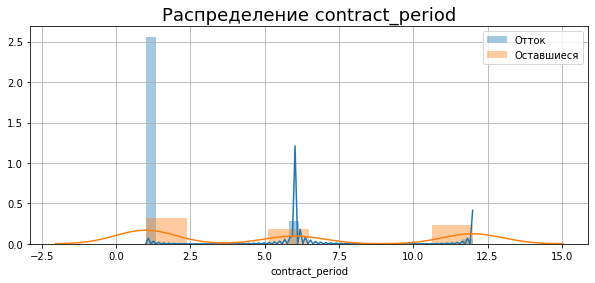

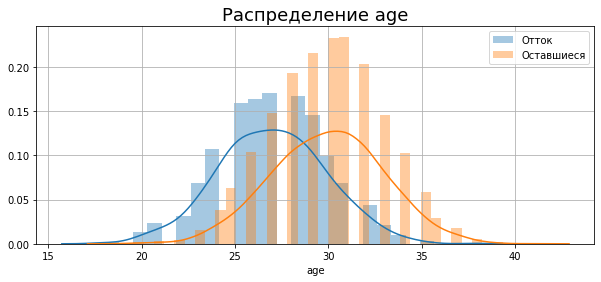

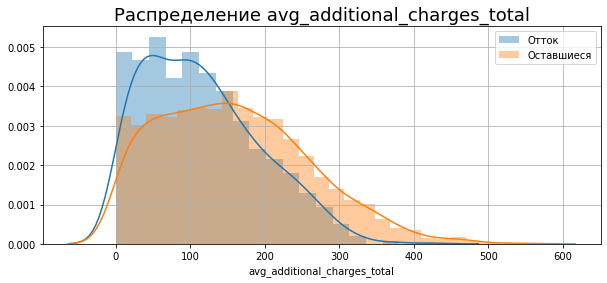

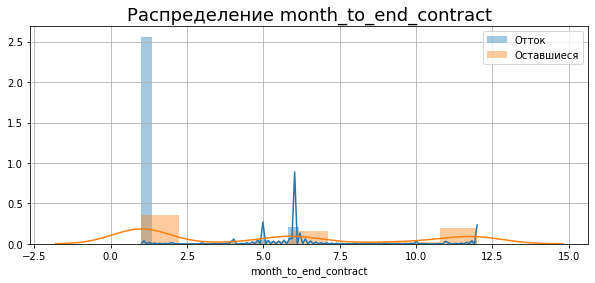

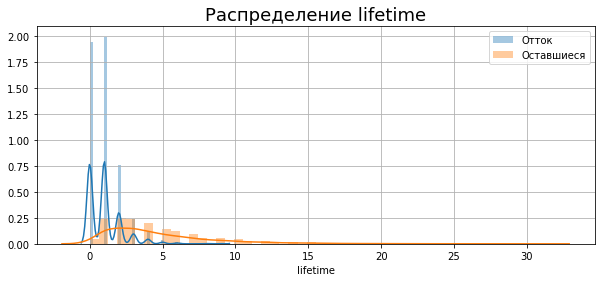

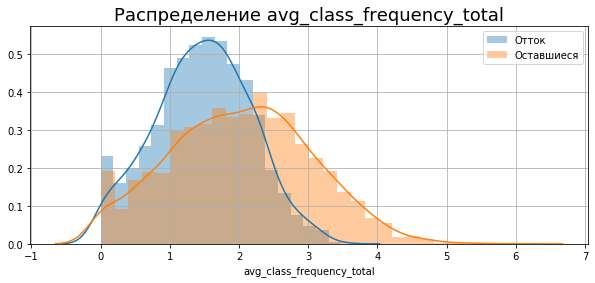

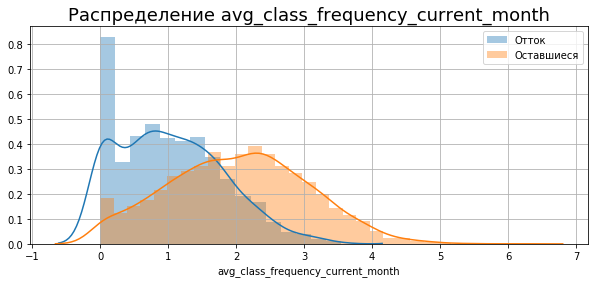

In [9]:
distplot_columns = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 
                    'lifetime', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month']    
for column in distplot_columns:
    plt.figure(figsize=(10,4)) 
    plt.title('Распределение ' + column, fontsize=18)
    sns.distplot(leave[column])
    sns.distplot(stay[column])
    plt.legend(['Отток', 'Оставшиеся'])
    plt.grid()
    plt.show()

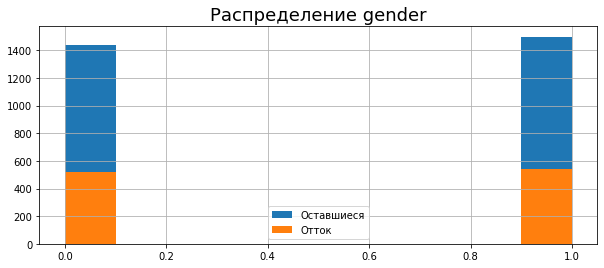

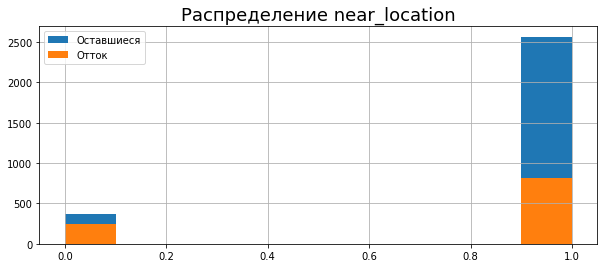

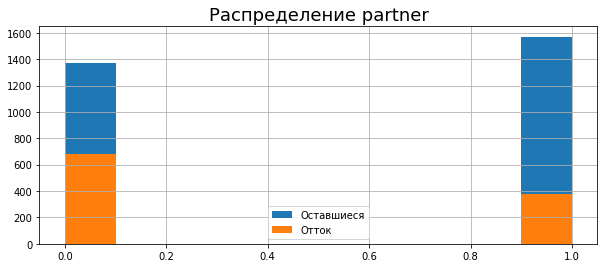

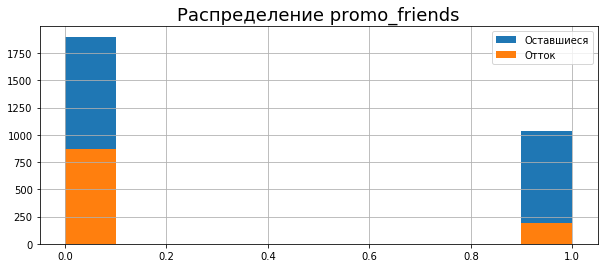

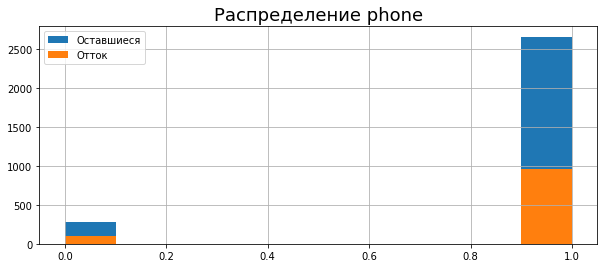

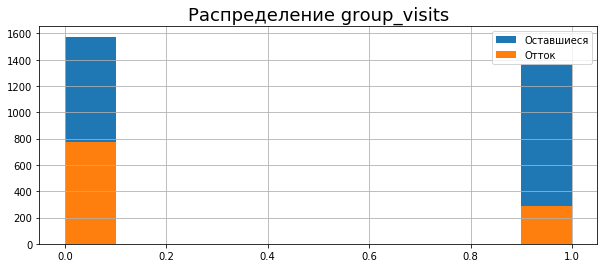

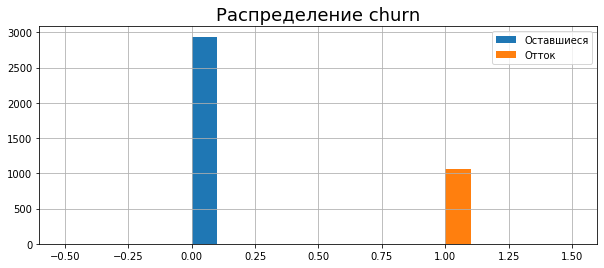

In [10]:
for column in df.columns:
    if column not in distplot_columns:
        plt.figure(figsize=(10,4)) 
        df.groupby('churn')[column].hist()
        plt.title('Распределение ' + column, fontsize=18)
        plt.legend(['Оставшиеся', 'Отток'])
        plt.show()

#### Построим матрицу корреляций и отобразим её

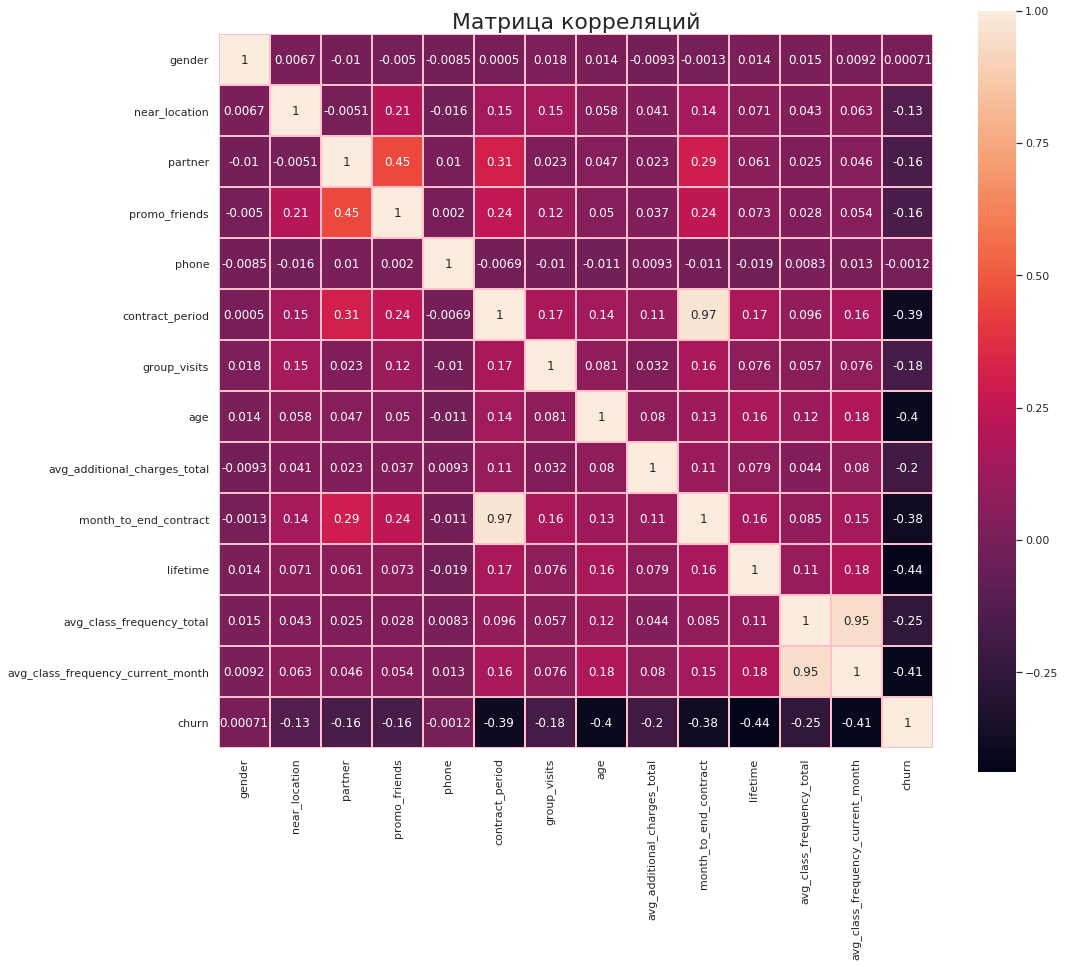

In [11]:
cm = df.corr()
sns.set(style='white')
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot = True, square=True, linewidths=1, linecolor='pink') 
plt.title('Матрица корреляций', fontsize=22)
plt.show()

##### Вывод

На графиках нет явной зависимости факта оттока от признаков. С целевой переменной коррелируют признаки 'аvg_class_frequency_total' и 'аvg_class_frequency_current_month', также имеются два мультиколлинеарных признака - 'contract_period' и 'month_to_end_contact'. 

## Шаг 3. Построить модель прогнозирования оттока клиентов


Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. 

#### Разобъем данные на обучающую и валидационную выборку функцией train_test_split()

In [12]:
X = df.drop(['churn'], axis = 1) 
y = df['churn']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

In [14]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

#### Обучим модель на train-выборке двумя способами

- логистической регрессией,
- случайным лесом.

In [15]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [16]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

#### Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке

Сравним по ним модели. Какая модель показала себя лучше на основании метрик?

In [17]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_pred)))

In [18]:
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)
print_all_metrics(
    y_test, rf_predictions, rf_probabilities, 
    title = 'Метрики для модели случайного леса:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.91
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.89


In [19]:
models = [
    LogisticRegression(),
    RandomForestRegressor()
]

In [20]:
def mape(y_true, y_pred):
    y_error = y_true - y_pred  
    y_error_abs = [abs(i) for i in y_error]  
    perc_error_abs = y_error_abs / y_true  
    mape = sum(perc_error_abs) / len(y_true) 
    return mape

In [21]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(
            mean_absolute_error(y_test, y_pred),
            mean_squared_error(y_test, y_pred),
            mape(y_test, y_pred),
            r2_score(y_test, y_pred),
        )
    )

In [22]:
for i in models:
    print(i)
    make_prediction(m=i,X_train = X_train_st, y_train= y_train,
                    X_test=X_test_st, y_test = y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
MAE:0.07 MSE:0.07 MAPE:nan R2:0.67 
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
MAE:0.12 MSE:0.06 MAPE:nan R2:0.69 


#### Вывод:

Согласно результатам нашей функции, модель логистической регрессии показала себя лучше. У модели логистической регрессии доля правильных прогнозов и полнота выше, чем у ансамблевой модели случайный лес. Метрики Accuracy, Precision, Recall показали себя лучше для модели логистической регрессии. Также в логистической регрессии F1 и ROC–AUC ближе к единице.

## Шаг 4. Сделать кластеризацию клиентов


#### Стандартизируем данные

In [23]:
sc = StandardScaler()
x_sc = sc.fit_transform(df)

#### Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму

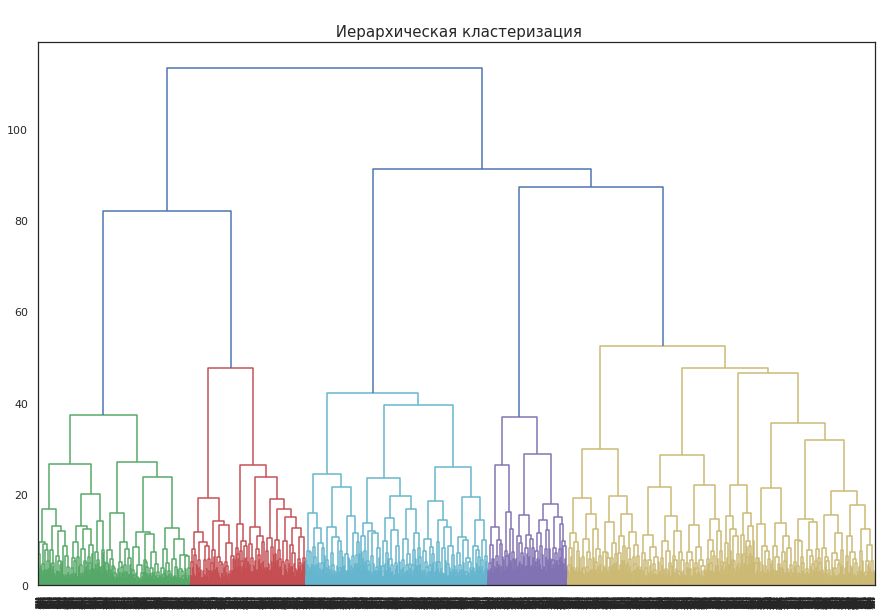

In [24]:
linked = linkage(x_sc, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()

##### Вывод

На основании полученного графика мы можем выделить пять кластеров, а значит для дальнейших расчетов n=5.

#### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов


In [25]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(x_sc)
df['cluster_km'] = labels

#### Посмотрим на средние значения признаков для кластеров

In [26]:
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


##### Вывод


Кластер 0
- Отток - 45%;
- Клиенты живут или работают далеко от фитнес-центра;
- Всего 7% пришли по промо;
- Клиенты не любители групповых занятий;
- Клиенты обладатели недолгосрочных абонементов на 2 месяца.

Кластер 1
- Отток - менее 1%
- Клиенты живут или работают не далеко от фитнес-центра;
- Чаще остальных кластеров используют партнерскую программу;
- Почти 53% пришли по промо;
- Клиенты обладают долгосрочными абонементами - 10 мес.;
- Чаще всех посещают клуб - 2.7 раз в неделю;
- Скорее всего только начали занятия.

Кластер 2
- Отток - 96% - самый высокий;
- Живут или работают недалеко от фитнес-центра;
- 32% - сотрудники компаний-партнеров;
- Заключают договора на короткий срок - 1,5 месяца.

Кластер 3
- Отток - менее 1%
- Клиенты живут или работают не далеко от фитнес-центра;
- 28% - сотрудники компаний-партнеров - самый низкий процент;
- 20% пришли по промо;
- Клиенты обладают короткосрочныйми абонементами - 1,8 мес.

Кластер 4
- Отток - 2%;
- Живут или работают недалеко от фитнес-центра;
- 74% используют партнерскую программу;
- Почти 53% пришли по промо;
- Клиенты обладают долгосрочными абонементами - 8,6 мес.;
- Любители групповых занятий;
- Реже остальных посещают занятия;
- Скорее всего только начали занятия.

#### Построим распределения признаков для кластеров

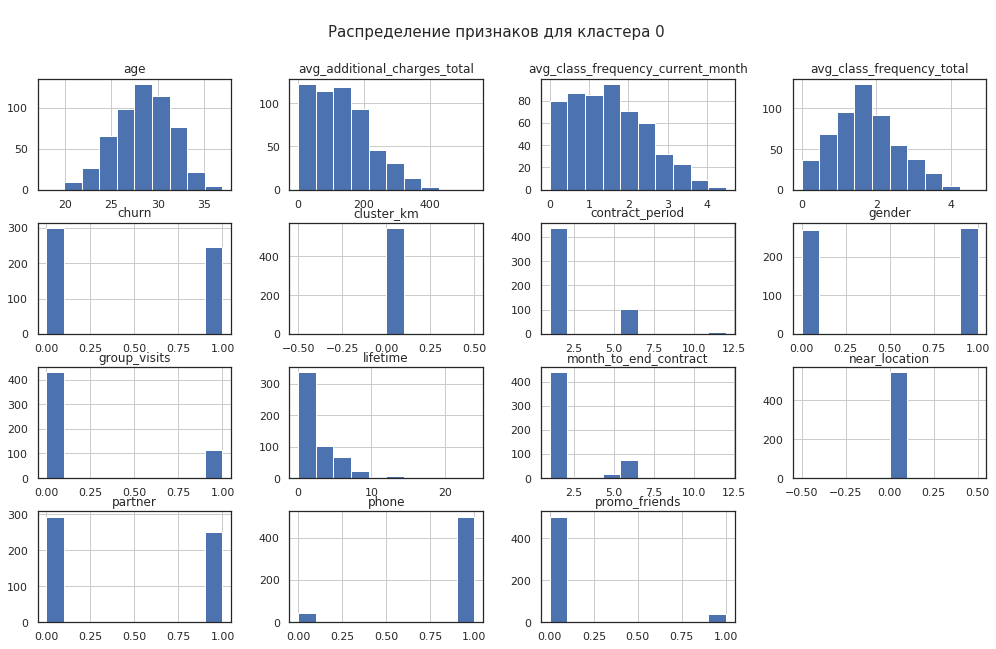

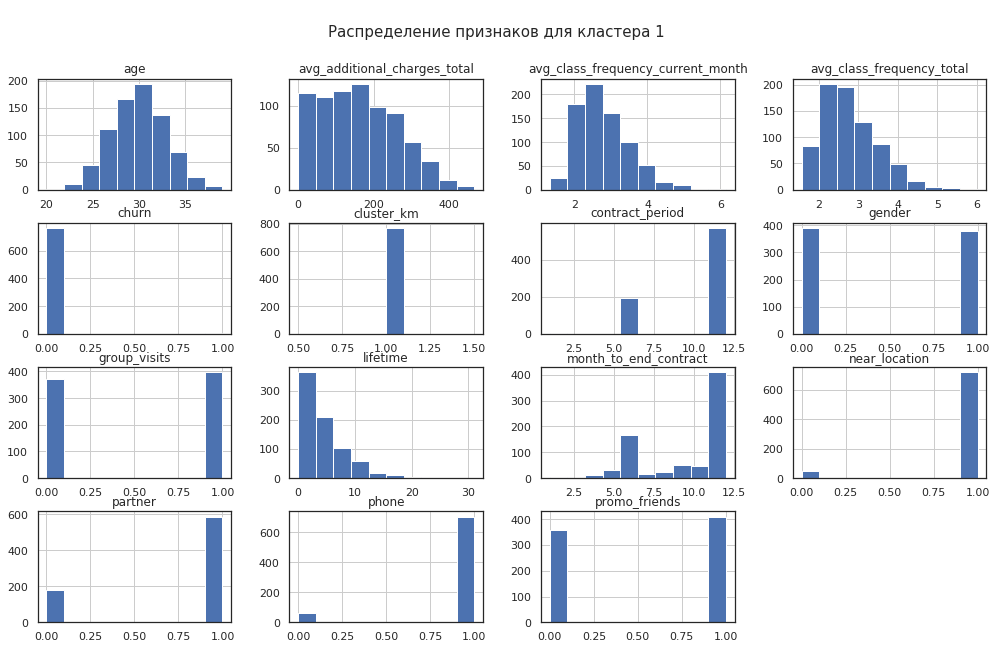

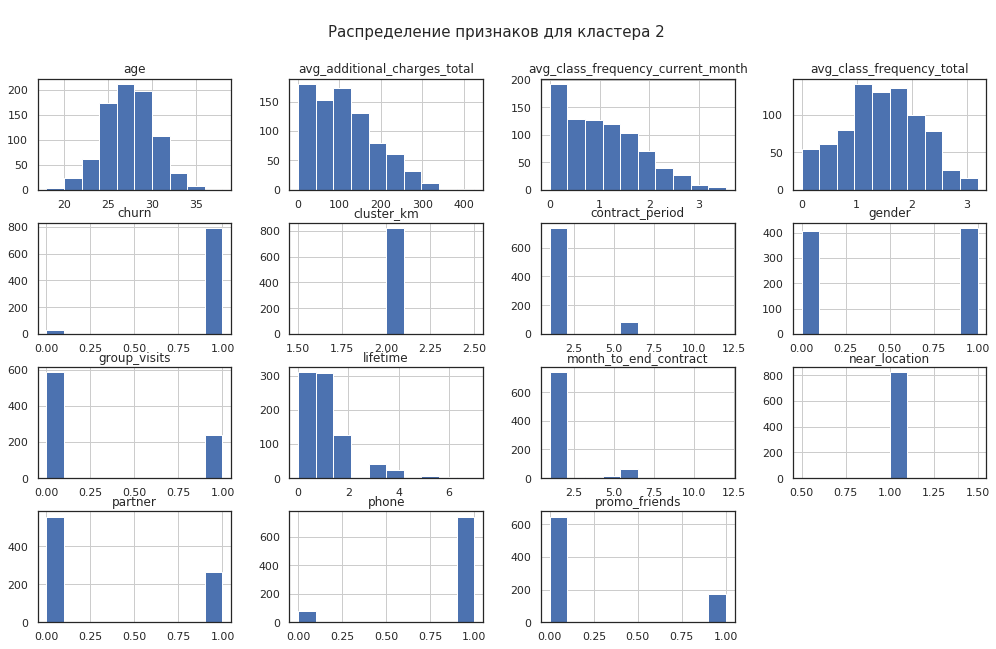

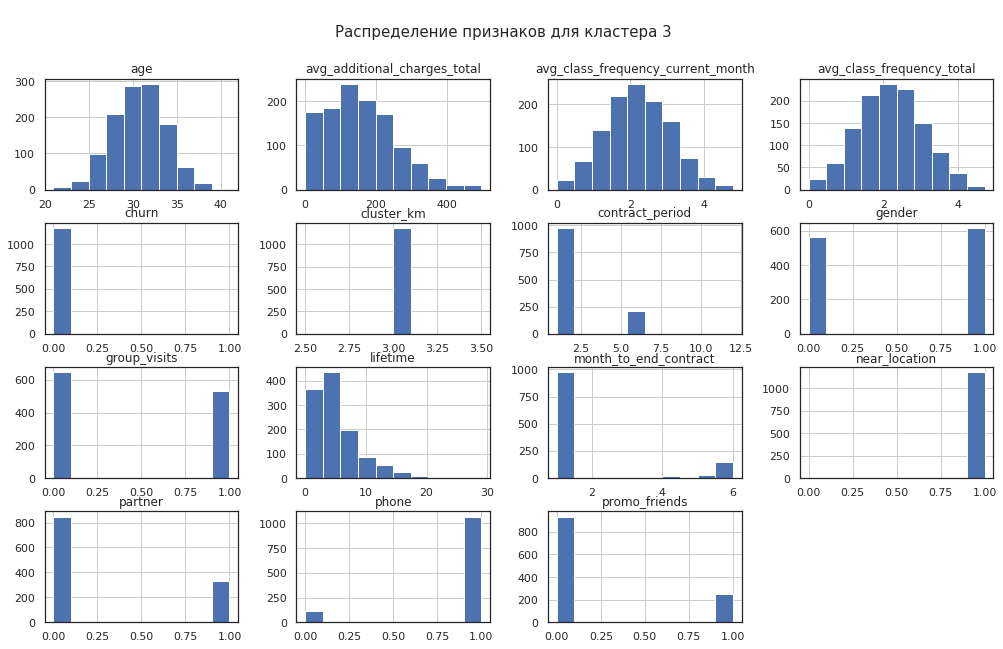

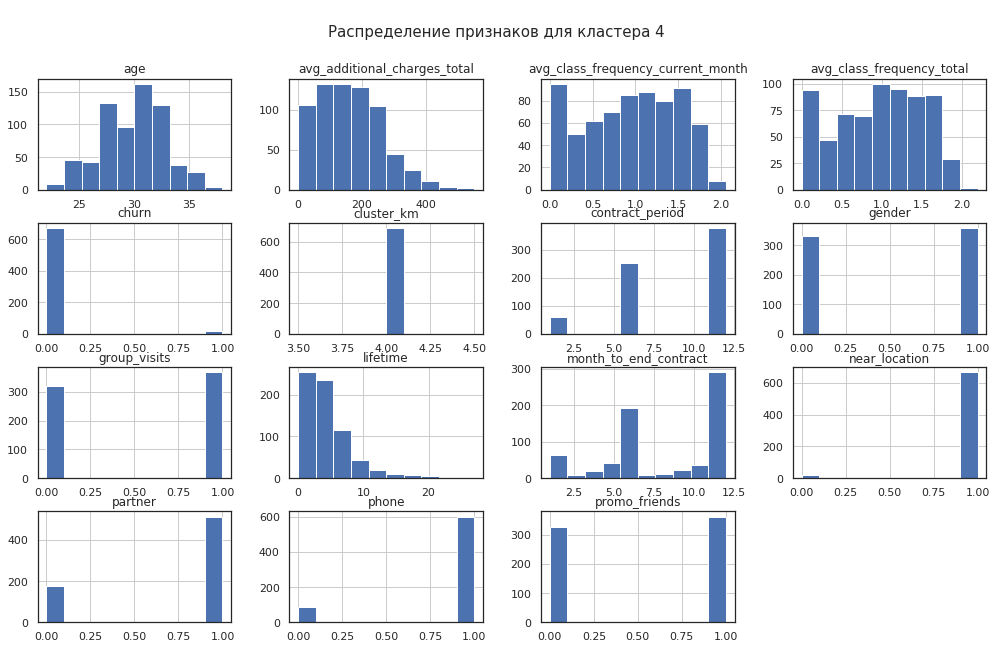

In [27]:
for value in [0, 1, 2, 3, 4]:
    df[df['cluster_km']==value].hist(figsize=(17,10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
    plt.show()

##### Вывод

Графики подтверждают выводы, сделанные после изучения средних значений кластеров.

#### Для каждого полученного кластера посчитаем долю оттока 

In [28]:
df.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.450368
1    0.007823
2    0.961023
3    0.003390
4    0.024709
Name: churn, dtype: float64

##### Вывод

Кластеры отличаются между собой по доле оттока. К оттоку склонен 2 кластер, частично - 0. Надежными можно считать  кластеры 1, 3 и 4.

## Шаг 5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами

Мы провели анализ и подготовили план действий по удержанию клиентов сети фитнес-центров. В нашем распоряжении был датасет на четыре тысячи строк и 14 столбцов.

Если посмотреть на средние значения, то можно отметить:

- распределение по полу практически равно;
- почти 85% клиентов живет или работает рядом с фитнес-клубом;
- почти 50% клиентов являются сотрудниками партнерских организаций;
- около 30% клиентов пришли по программе "Приведи друга";
- у 90% клиентов известны телефонные номера;
- средняя длительность абонементов клиентов - 4,7 месяцев;
- около 40% клиентов посещают групповые занятия;
- средний возраст клиентов 29 лет;
- средние дополнительные расходы на клиента - 146;
- средний срок до окончания договора - 4,3 месяцев;
- среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев;
- средняя частота посещений за все время - 1,9 раз в неделю;
- средняя частота посещений за последний месяц - 1,8 раз в неделю;
- доля оттока - 27%.

Если посмотреть на средние значения в двух группах (попавших в отток и оставшихся), то можно отметить:

- распределение по полу не отличается;
- живущие или работающие на небольшом расстоянии до фитнес-клуба клиенты реже попадают в отток, что вполне логично;
- сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб, чем остальные клиенты;
- клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток;
- наличие номера клиента не отличается;
- средняя длительность договора больше у оставшихся пользователей, у клиентов в оттоке срок договора составляет 1 месяц;
- оставшиеся пользователи чаще ходят на групповые занятия;
- у групп есть разница в среднем возрасте клиентов: отток - 26,9, оставшиеся - 29,9;
- время до окончания срока действия договора больше у оставшихся клиентов;
- количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке.

На представленных графиках нет явной зависимости факта оттока от признаков. С целевой переменной коррелируют признаки 'аvg_class_frequency_total' и 'аvg_class_frequency_current_month', также имеются два мультиколлинеарных признака - 'contract_period' и 'month_to_end_contact'.
 
Модель логистической регрессии показала себя лучше. У модели логистической регрессии доля правильных прогнозов и полнота выше, чем у ансамблевой модели случайный лес. Метрики Accuracy, Precision, Recall показали себя лучше для модели логистической регрессии.

На основании графика иерархической кластеризации мы можем выделить пять кластеров, а значит для дальнейших расчетов n=5.

Кластер 0
- Отток - 45%;
- Клиенты живут или работают далеко от фитнес-центра;
- Всего 7% пришли по промо;
- Клиенты не любители групповых занятий;
- Клиенты обладатели недолгосрочных абонементов на 2 месяца.

Кластер 1
- Отток - менее 1%
- Клиенты живут или работают не далеко от фитнес-центра;
- Чаще остальных кластеров используют партнерскую программу;
- Почти 53% пришли по промо;
- Клиенты обладают долгосрочными абонементами - 10 мес.;
- Чаще всех посещают клуб - 2.7 раз в неделю;
- Скорее всего только начали занятия.

Кластер 2
- Отток - 96% - самый высокий;
- Живут или работают недалеко от фитнес-центра;
- 32% - сотрудники компаний-партнеров;
- Заключают договора на короткий срок - 1,5 месяца.

Кластер 3
- Отток - менее 1%
- Клиенты живут или работают не далеко от фитнес-центра;
- 28% - сотрудники компаний-партнеров - самый низкий процент;
- 20% пришли по промо;
- Клиенты обладают короткосрочныйми абонементами - 1,8 мес.

Кластер 4
- Отток - 2%;
- Живут или работают недалеко от фитнес-центра;
- 74% используют партнерскую программу;
- Почти 53% пришли по промо;
- Клиенты обладают долгосрочными абонементами - 8,6 мес.;
- Любители групповых занятий;
- Реже остальных посещают занятия;
- Скорее всего только начали занятия.

Кластеры отличаются между собой по доле оттока. К оттоку склонен 2 кластер, частично - 0. Надежными можно считать кластеры 1, 3 и 4.

#### Рекомендации

- Выгоднее продавать больше долгосрочных абонементов, что вполне логично. Отток у клиентов с долгосрочными абонементами ниже, чем у клиентов с краткосрочными абонементами.

- Можно отметить, что у клиентов, пришедших по каким-то акциям или партнерским программам, также доля оттока ниже. Стоит продолжать работу в этом направлении.

- Отток у клиентов, занимающихся в группах, ниже, чем у тех, кто занимается самостоятельно. Стоит развивать групповые программы в фитнес-центрах. 

- Предлагать клиентам что-то помимо спортивных услуг - кафе, спорт-товары, косметический и массажный салон. Так клиенты заинтересованы остаться в фитнес-клубе.

- Ценностью проделанной работы является возможность предсказывать вероятность оттока клиентов в последующий месяц. Так, менеджеры клуба смогут усилить работу с теми, кто планирует завершить посещения клуба.